In [1]:
# Install all require library
!pip install requests
!pip install bs4

  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1257 sha256=1f70948098a648882f730b6ae01dab1fd165e07778c01716cb32d47cfe09864b
  Stored in directory: /root/.cache/pip/wheels/25/42/45/b773edc52acb16cd2db4cf1a0b47117e2f69bb4eb300ed0e70
Successfully built bs4


In [2]:
# Import all require library like request,os,panda,csv and beautiful.
import bs4
from bs4 import BeautifulSoup
import os
import pandas as pd
import requests

In [5]:
# After import all the libraries we need to headers and save it variable.
headers={"User-Agent":"mozilla/5.0"}

# Now we need to save the url in a variable from where the data will download.
url='https://bioinfo.usu.edu/covidTracker/india.php'

# Now use requests library to get the url with headers and convert into text and save in a variable.
rqd = requests.get(url,headers=headers,verify=False).text

# Then use 'panda.read' to read the data in html.
df = pd.read_html(rqd)[0]

# Now save the data in to a variable after convert into a dataframe with the help of 'pd.DataFrame'.
dg=pd.DataFrame(df)

# We used head() function to see the data. By default it will show first 5 rows but you assign '()' here how many rows you want to see.
dg.head(50)

/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'bioinfo.usu.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


,State,Total Cases,Total Recovered,Total Deaths,Active Cases
0,Andaman and Nicobar Islands,7440,7214,127,99
1,Andhra Pradesh,1867017,1804844,12490,49683
2,Arunachal Pradesh,33916,31189,160,2567
3,Assam,493688,458330,4344,29667
4,Bihar,720717,708586,9573,2557
5,Chandigarh,61542,60488,807,247
6,Chhattisgarh,992391,971662,13415,7314
7,Dadra and Nagar Haveli and Daman and Diu,10527,10435,4,55
8,Delhi,1433475,1406760,24948,1767
9,Goa,165426,159677,3022,2727


In [7]:
# To check how many rows and columns we have in the data.
dg.shape

(37, 5)

In [9]:
# To check the data type and some more information about data
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            37 non-null     object
 1   Total Cases      37 non-null     int64 
 2   Total Recovered  37 non-null     int64 
 3   Total Deaths     37 non-null     int64 
 4   Active Cases     37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [10]:
# To check the null value if we found any null value then it must take care.
dg.isna().sum()

State              0
Total Cases        0
Total Recovered    0
Total Deaths       0
Active Cases       0
dtype: int64

In [11]:
# We hve to rename the columns name as per requirement.
dg = dg.rename(columns={'Total Cases':'Affected','Total Recovered':'Survived/Recover','Total Deaths':'Death'})

In [13]:
# We have to remove the unwanted rows from this data.
dg.drop(index=dg.index[30],axis=0,inplace=True)

In [14]:
# Need to check data for all changes that we made. But after delete some rows the index has been changed.
dg.head(50)

,State,Affected,Survived/Recover,Death,Active Cases
0,Andaman and Nicobar Islands,7440,7214,127,99
1,Andhra Pradesh,1867017,1804844,12490,49683
2,Arunachal Pradesh,33916,31189,160,2567
3,Assam,493688,458330,4344,29667
4,Bihar,720717,708586,9573,2557
5,Chandigarh,61542,60488,807,247
6,Chhattisgarh,992391,971662,13415,7314
7,Dadra and Nagar Haveli and Daman and Diu,10527,10435,4,55
8,Delhi,1433475,1406760,24948,1767
9,Goa,165426,159677,3022,2727


In [15]:
# In order to reset the index we can use reset.index function.
dg = dg.reset_index(drop=True)

In [16]:
# We can see the index has been reset sucessfully.
dg.head(50)

,State,Affected,Survived/Recover,Death,Active Cases
0,Andaman and Nicobar Islands,7440,7214,127,99
1,Andhra Pradesh,1867017,1804844,12490,49683
2,Arunachal Pradesh,33916,31189,160,2567
3,Assam,493688,458330,4344,29667
4,Bihar,720717,708586,9573,2557
5,Chandigarh,61542,60488,807,247
6,Chhattisgarh,992391,971662,13415,7314
7,Dadra and Nagar Haveli and Daman and Diu,10527,10435,4,55
8,Delhi,1433475,1406760,24948,1767
9,Goa,165426,159677,3022,2727


In [22]:
# To see the changes in the data.
dg.shape

(36, 5)

In [23]:
# Check the info of the data again.
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             36 non-null     object
 1   Affected          36 non-null     int64 
 2   Survived/Recover  36 non-null     int64 
 3   Death             36 non-null     int64 
 4   Active Cases      36 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [24]:
# Export the data and save into a csv format.
dg.to_csv ('Data_3.csv', index = False, header=True)

# **Analysis**

In [25]:
# We need to import matplotlib and seaborn library for create the reports on this data.
import matplotlib.pyplot as plt
import seaborn as sns

### Analysis of COVID Affected in Each State of India

Text(0.5, 1.0, 'Total affected people of each state')

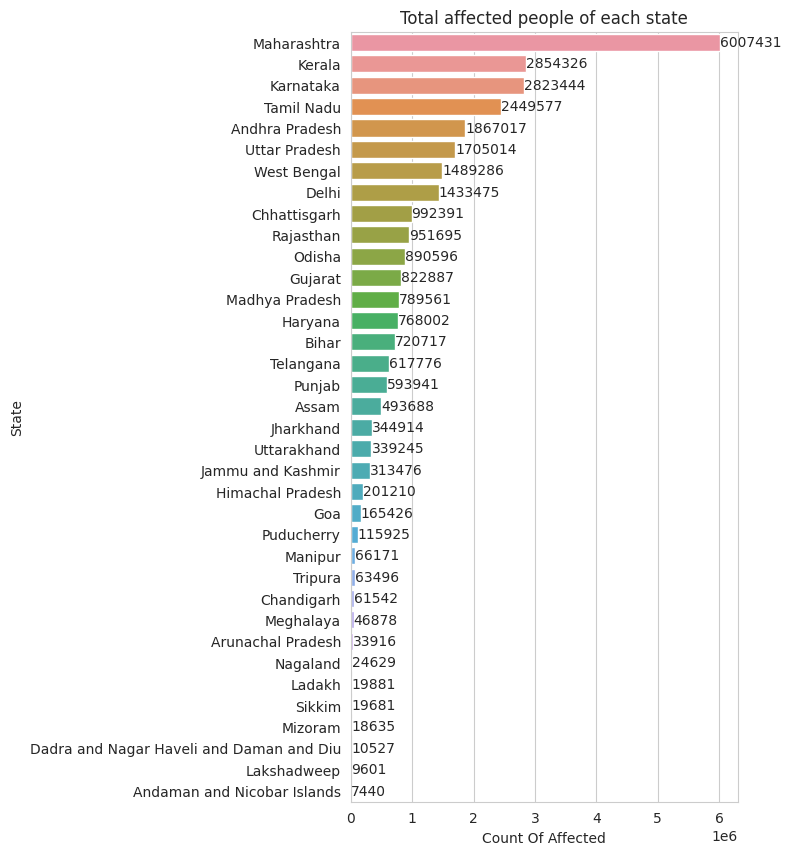

In [26]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not mandatory.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
ed_sh = dg.sort_values(by=['Affected'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Affected' columns and mention the data.
xm = sns.barplot(y = 'State', x = 'Affected', data = ed_sh)

# We created this forloop for mention the count on each bar.
for i in xm.containers:
  xm.bar_label(i, fmt='%.0f', label_type='edge')

plt.xlabel("Count Of Affected") # This is title of x axis.
plt.ylabel("State") # This is title of Y axis.
plt.title("Total affected people of each state") # This is Title of Diagram.

This diagram presents a visual representation of the COVID-19 case distribution across states in India. Maharashtra emerges with the highest number of reported cases, indicating a significant impact in terms of affected individuals, while the Andaman and Nicobar Islands exhibit the lowest number of cases.

# *Recovery Cases From Covid Analysis in each state of India*

Text(0.5, 1.0, 'Total number of Recovery case in each state')

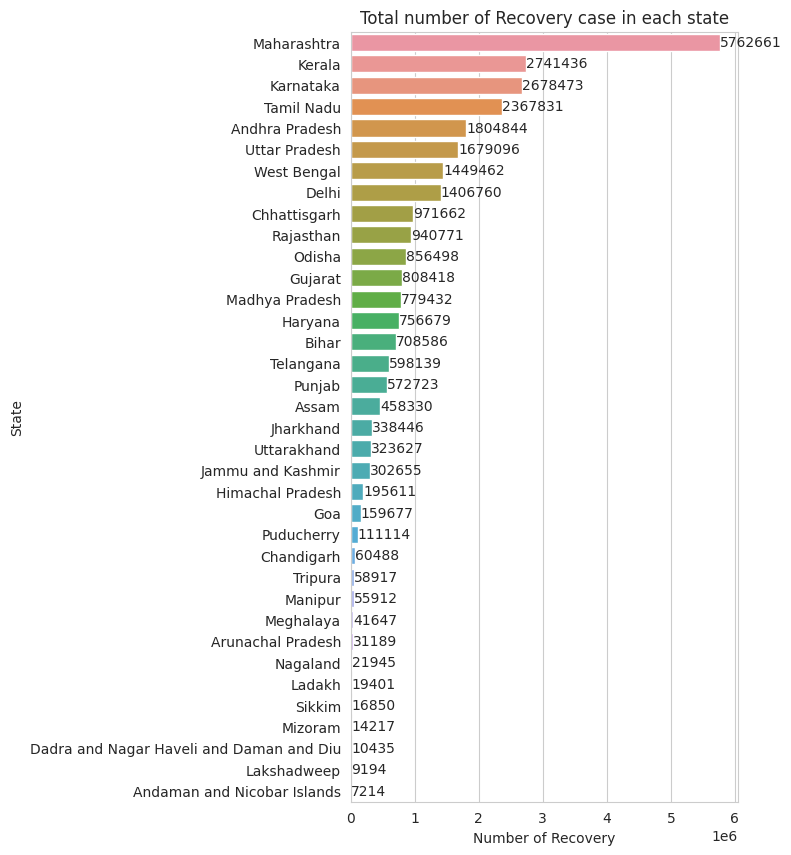

In [28]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
pl_sh = dg.sort_values(by=['Survived/Recover'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Survived/Recover' columns and mention the data.
vu = sns.barplot(y = 'State', x = 'Survived/Recover', data = pl_sh)

# We created this forloop for mention the count on each bar.
for bars in vu.containers:
  vu.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Recovery") # Title of x axis.
plt.ylabel("State") # Title of y axis.
plt.title("Total number of Recovery case in each state") # Title of this Diagram.

After conducting a thorough analysis of the data and presenting the findings visually, it becomes evident that Maharashtra stands out with the highest number of COVID-19 recoveries among all states in India. This indicates commendable efforts in terms of healthcare management and successful recovery strategies implemented in the state. On the other hand, the Andaman and Nicobar Islands show the lowest number of COVID-19 recoveries, highlighting the need for enhanced measures to improve the recovery rates in that region. The data underscores the significance of tailored approaches and focused interventions to ensure better outcomes in COVID-19 recovery efforts across different states in India.

## Compare with Survived and Affected Case

Text(0.5, 1.0, 'Compare With Survived and Affected Case')

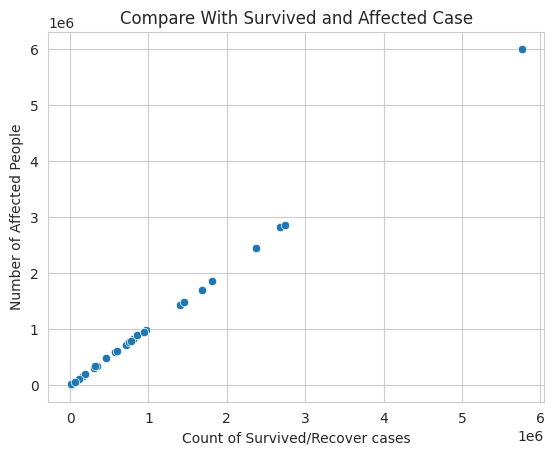

In [29]:
# We can use scatterplot for compare two numerical data.
sns.scatterplot(x= "Survived/Recover", y= "Affected", data = dg)

plt.xlabel("Count of Survived/Recover cases") # Title of x axis.
plt.ylabel("Number of Affected People") # Title of y axis.
plt.title("Compare With Survived and Affected Case") # Title of this Diagram.

Upon a detailed examination of the data pertaining to survival and the number of affected cases, a notable trend becomes apparent: the graph demonstrates a consistent linear regression pattern. This suggests a substantial proportion of individuals successfully recovering from COVID-19 across all states in India. Although it is disheartening that some individuals have unfortunately lost their lives to the virus, the overall trend indicates an encouraging survival rate of approximately 85% among the affected population. This highlights the resilience and effectiveness of efforts in combating the virus and promoting recovery in India.

## Covid Death Analysis in each state of India

Text(0.5, 1.0, 'Total number of Death case in each state')

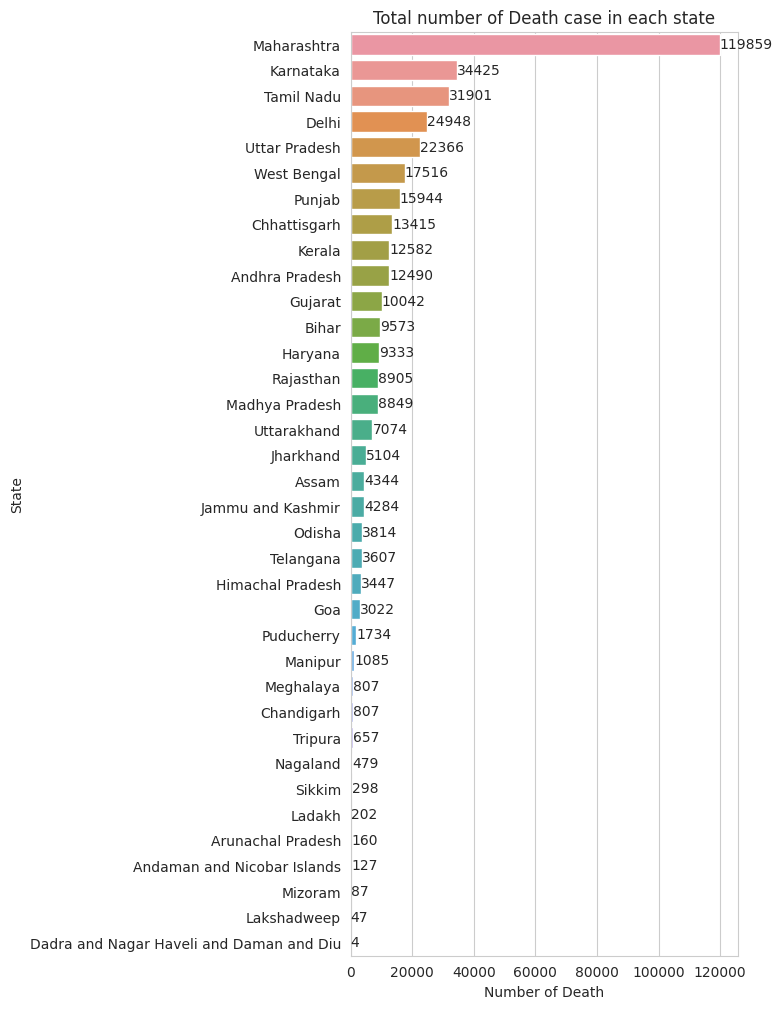

In [30]:
# This is the plot size configaration.
plt.figure(figsize=(5,12))

# Now we can use plot style but it's optional.
sns.set_style("whitegrid")

# In order to sort the data in decending order.
dp_sh = dg.sort_values(by=['Death'],ascending=False)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Death' columns and mention the data.
sf = sns.barplot(y = 'State', x = 'Death', data = dp_sh)

# We created this forloop for mention the count on each bar.
for bars in sf.containers:
  sf.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Death") # Label of X axis.
plt.ylabel("State") # Label Of Y axis.
plt.title("Total number of Death case in each state") # Title of the Plot.

The chart displaying COVID-19 death cases in each state of India presents a sobering reality: a significant loss of lives. Maharashtra bears the highest number of COVID-19-related deaths, reflecting the substantial impact on the state. Conversely, the union territory of Dadra and Nagar Haveli and Daman and Diu records the lowest number of deaths, indicating comparatively fewer fatalities in that region.

### Covid Active Cases Analysis in each state of India

Text(0.5, 1.0, 'Total Active Cases of each state in India')

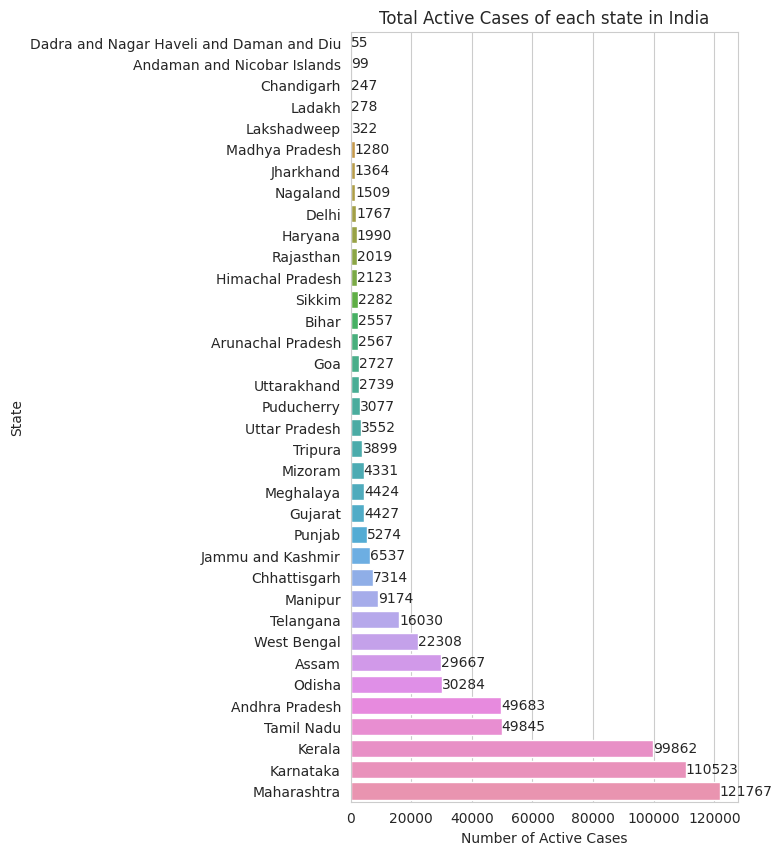

In [27]:
# This is the plot size configaration.
plt.figure(figsize=(5,10))

# Now we can use plot style but it's not needed every time.
sns.set_style("whitegrid")

# In order to sort the data in ascending order.
tb_sh = dg.sort_values(by=['Active Cases'],ascending=True)

# We used seaborn to making the diagram, Y axis is define 'state' and x axis is define 'Active Cases' columns and mention the data.
ml = sns.barplot(y = 'State', x = 'Active Cases', data = tb_sh)

# We created this forloop for mention the count on each bar.
for bars in ml.containers:
  ml.bar_label(bars, fmt='%.0f', label_type='edge')

plt.xlabel("Number of Active Cases") # This is label of x axis.
plt.ylabel("State") # This is label of Y axis.
plt.title("Total Active Cases of each state in India") # This is Title of Chart.


This diagram illustrates the distribution of active COVID-19 cases in various states of India. Our analysis indicates that Maharashtra has the highest number of active cases, indicating a significant ongoing outbreak within the state. In contrast, the Dadra and Nagar Haveli and Daman and Diu have the lowest number of active cases, suggesting a relatively lower prevalence of the virus in that region.